# The Fastest Intro to Data Science

In this notebook, we will show you how to solve a data analysis problem end-to-end.

The steps and decisions I took may not be the best or the fastest - the goal is to give you an **overview** of what steps might be necessary.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 0. Playground

This is where we play & test stuff out! First, the shortcut table:

| How do I... | Shortcut |
| :--- | ---: |
| ... **select** a cell? | Click on the left of the cell. The vertical line is blue. |
| ... **edit** a cell? | Double click on the cell. The vertical line is green. |
| ... add cell **a**bove? | Select a cell and press `A` |
| ... add cell **b**elow? | Select a cell and press `B` |
| ... **delete** a cell? | Select a cell and press `DD` |
| ... change cell type to **markdown** (text)? | Select a cell and press `M`  |
| ... change cell type to **code**? | Select a cell and press `Y` |
| ... **run** a cell? | Select the cell(s) and press `Shift`+`Enter` |


**The notebook shares variables and functions between cells.**

Even if you delete a cell, if it was run at any point, its contents are part of the notebook until the kernel is restarted.

In [ ]:
# your code here

## 1. Python

#### 1.1. **Comments**

First, how to write comments. Feel free to annotate a lot, so that you remember what you did and why :)

In [1]:
# This is a comment

"""This is also a comment"""

'This is also a comment'

#### 1.2. Syntax

Below are some examples to get a feel for Python if you've never seen it before. There are (for our level) no types for the variables.

In [15]:
# Variables

x = 5
y = 0.25
z = "some text"

# lists
a = [1, 2, 3]
b = [x, y, z]

In [16]:
print(x + y)
print(x * z)
# print(y * z)    # this does not work

print(b)          # lists can have any objects as elements
print(a * x)

5.25
some textsome textsome textsome textsome text
[5, 0.25, 'some text']
[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


Since Python doesn't use brackets to divide namespaces, the spacing is very important. For example, **all the code inside a loop or an if-else must have the same indent!**

In [17]:
# Loops

for i in range(len(a)): # range(n) yields all values in the interval [0, n-1]
    a[i] += 2           # select element with a[.]

a

[3, 4, 5]

In [18]:
# Conditionals 

def is_odd(x):
    if x % 2 == 0:
        return True
    else:
        return False

is_odd(5)

False

Python also has `while`-loops and cool things like *comprehensions*, but let's leave that for now.

#### 1.3. numpy

One of the most important libraries when working with numerical data is `numpy`. It provides support for many numerical operations on scalars, vectors, matrices and fields.

In [4]:
import numpy as np   # importing numpy with the alias np

In [5]:
n = np.array([1, 2, 3])                   # initialize array with a list
m = np.array([[1, 2, 3], [4, 5, 6]])      # initialize 2D array with list of lists -> matrix

In [6]:
n

array([1, 2, 3])

In [8]:
n.shape     # very important attribute, tells us the form of the vector or array
 
# (3,) means that a is a column (standing) vector with 3 elements 

(3,)

In [10]:
n.sum()           # no arguments -> sum of all elements in the array

6

In [7]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
m.shape   # 2 rows, 3 columns

(2, 3)

In [13]:
m.sum(axis=0)     # axis=0 means per column, axis=1 means per row

array([5, 7, 9])


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 2. Data Analysis

Two libraries will help us analyse our data - `pandas` and `matplotlib`.

We use `pandas` to read in tabular data from local files, as well as to clean and transform the data. It also offers some visualization functions, but the freedom there is limited.
`matplotlib` is a rich visualization library.  

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline      # show the visualizations in-line
sns.set_theme()

## 2.1. Data

The dataset is a simplified version of the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php)'s [Statlog (German Credit Data) Data Set](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). 

Modified version downloaded from [Kaggle](https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk). [License](https://creativecommons.org/publicdomain/zero/1.0/).

In [18]:
data = pd.read_csv('german_credit_data.csv')

In [19]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


## 2.2. General functions

In [20]:
# Show the first n lines (no number gives first 5)

data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [21]:
# Show the last n lines

data.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [22]:
# Overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


A lot of info here: 

- 1000 entries/people
- 9 features (Age-Purpose)
- 1 target variable: Risk
- Missing values in two of the features

In [23]:
# Selection - column

data['Purpose']

0                 radio/TV
1                 radio/TV
2                education
3      furniture/equipment
4                      car
              ...         
995    furniture/equipment
996                    car
997               radio/TV
998               radio/TV
999                    car
Name: Purpose, Length: 1000, dtype: object

In [24]:
# Selection - row

data.iloc[0]

Unnamed: 0                 0
Age                       67
Sex                     male
Job                        2
Housing                  own
Saving accounts          NaN
Checking account      little
Credit amount           1169
Duration                   6
Purpose             radio/TV
Risk                    good
Name: 0, dtype: object

In [25]:
# Selection - condition

data[data['Credit amount'] < 500]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
26,26,39,male,1,own,little,NaN,426,6,radio/TV,good
27,27,42,female,2,rent,rich,rich,409,12,radio/TV,good
39,39,24,male,2,own,little,moderate,458,9,radio/TV,good
111,111,23,female,2,rent,little,rich,392,15,education,good
157,157,45,male,1,own,little,little,339,12,education,good
177,177,52,male,2,own,quite rich,little,338,6,radio/TV,good
249,249,22,female,2,rent,little,NaN,433,18,radio/TV,bad
309,309,22,male,1,rent,little,moderate,276,9,car,good
379,379,52,female,1,own,moderate,NaN,362,6,car,good
458,458,27,female,2,own,little,little,343,6,domestic appliances,good


In [26]:
data[data['Purpose'] == 'domestic appliances']

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
38,38,37,male,2,own,little,rich,1225,10,domestic appliances,good
162,162,36,male,2,own,quite rich,NaN,1262,15,domestic appliances,good
207,207,26,male,2,own,little,moderate,1424,12,domestic appliances,good
337,337,24,female,2,rent,NaN,little,1275,15,domestic appliances,bad
350,350,23,female,2,rent,little,NaN,1236,9,domestic appliances,good
458,458,27,female,2,own,little,little,343,6,domestic appliances,good
588,588,47,male,1,own,little,little,1217,18,domestic appliances,bad
610,610,22,female,2,own,moderate,little,741,12,domestic appliances,bad
735,735,29,female,0,own,NaN,moderate,3990,36,domestic appliances,good
813,813,54,male,2,own,little,little,3051,48,domestic appliances,bad


---------------

## 2.3. Exploratory data analysis (EDA)

My favourite way to get an overview of the features is to visualize how each is distributed. Of course, there are different types of features, numerical, categorical, text etc. For this data set, we need to take only two cases into account - numerical features (integers/floats) and categorical features (small number of distinct values).

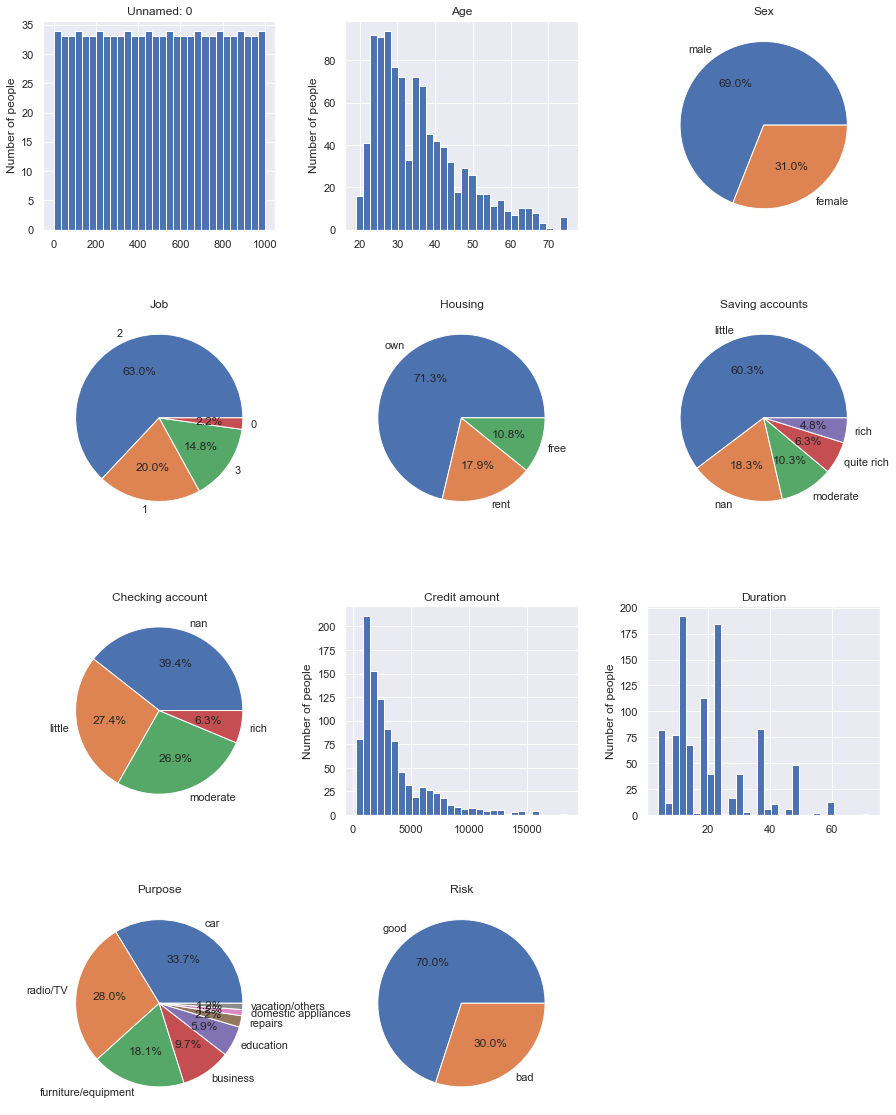

In [27]:
# Plot feature distributions

# Set the size of the entire plot (I set this by trial and error :)
fig = plt.figure(figsize=(15, 20))  

# Go through all the columns (there is 10 of them with the target)
for i, col in enumerate(data.columns):
    
    sp = plt.subplot(4, 3, i+1)  # 4 x 3 is the grid to place the plots in
    sp.set_title(col)
    
    # Get the distinct counts of the feature
    vals = data[col].value_counts(dropna=False)
    
    if len(vals) > 10:    # If the column has more than 10 distinct values, we
                          # can assume the column is not categorical
        sp.set_ylabel('Number of people')
        plt.hist(data[col], bins=30)    # Nice histogram
        
    else:    # Categorical data
        plt.pie(vals.values, labels=vals.index, autopct='%1.1f%%')   # Pie plot
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

Some things we notice:

- Most people in the dataset are 20-40 years old
- The 'Job' column has four values. Looking into the [dataset description](https://www.kaggle.com/datasets/uciml/german-credit), we can see that the meanings are as follows:
| Code | Job type |
| :--- | ---: |
| 0 | unskilled and non-resident |
| 1 | unskilled and resident |
| 2 | skilled |
| 3 | highly skilled |

- The credit amount was usually 2000-3000 DM
- The credit duration was 60 months at most, usually 12 or 24 months
- The target variable `Risk` is unbalanced - 70% of the credits were low-risk ('good')

---------

Another useful function is `.describe()`, which shows us important statistics of the columns/features. We saw some of them in the visualizations above. `.describe()` can be used on the entire `DataFrame`, but also on chosen columns.

In [28]:
data.describe()

# data['Age'].describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


### Why are only some features shown?

Statistics like the mean and standard deviation can be computed only for numerical features. All other features in our data set have the dtype `object`, which means the values are strings. Later, we will see how to obtain useful statistics for these other features by changing their data type to `category`.

--------


### Correlation

For the same numerical features, we can also compute the correlation.

The correlation coefficient is a value between -1 and 1. 
- A coefficient of 0 means that the two variables are not correlated, that is, we can't draw conclusions about one variable if we know the other.
- Coefficients >0 denote a positive correlation, meaning that an increase in one variable is connected to an increase in the other variable. A value of 1 means the variables are exactly equal.
- Coefficients <0 denote a negative correlation, meaning that an increase in one variable is connected to a decrease in the other variable. 

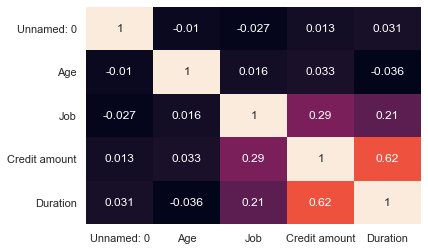

In [29]:
correlation = data.corr()

sns.heatmap(correlation,   
            annot=True, 
            cbar=False
           )
plt.show()

We can see that there is a relatively high positive correlation between the variables `Credit amount` and `Duration`. Of course, larger credit amounts usually have longer credit durations, so no surprise there.

------

Let's try to answer some data science questions.

### Do people with highly skilled jobs take out larger loans?

We can use a boxplot to answer this question. The center line of the box represents the mean credit amount of all people with a particular job level. The box shows the quartiles, and the whiskers going up and down - the entirety of the distribution's support. The points above the whiskers are considered to be outliers.

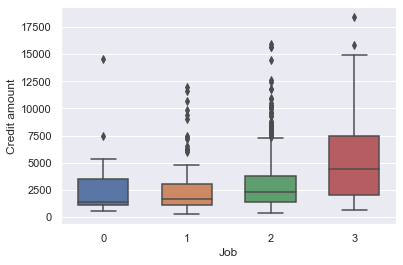

In [30]:
sns.boxplot(x="Job", y="Credit amount", data=data, width=.6)
plt.show()

Yes, apparently. The loans taken out by people with job level 3 are 2000 DM higher on average.

### Is there a difference between men and women when looking at the credit's purpose?

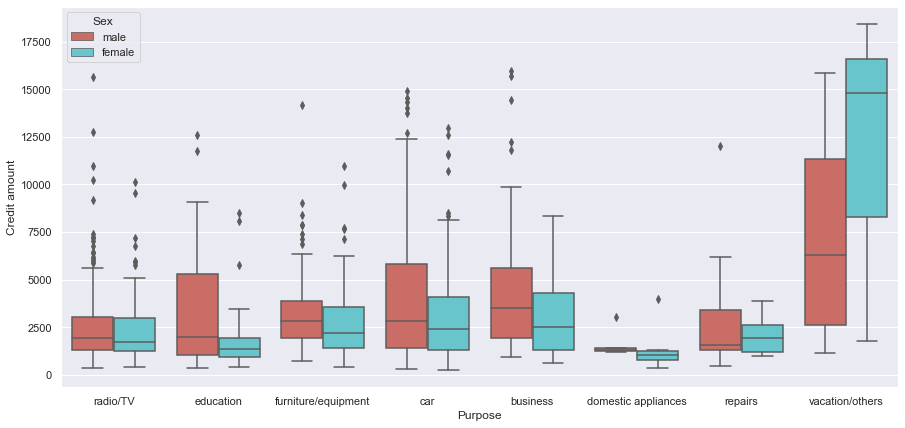

In [31]:
fig = plt.figure(figsize=(15, 7)) 

sns.boxplot(data=data, x="Purpose", y="Credit amount", palette='hls', hue="Sex")
plt.show()

Women in the data set took on much larger loans for the `vacation/others` purpose. For most other categories, the credit amounts are higher for men, both on average and on maximum.

### Is the credit's purpose indicative of the risk?

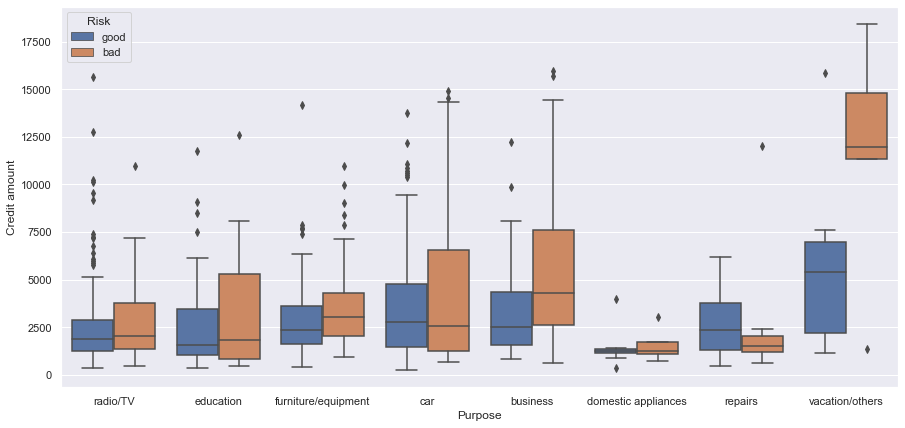

In [32]:
fig = plt.figure(figsize=(15, 7)) 
sns.boxplot(x="Purpose", y="Credit amount", data=data, hue = "Risk")
plt.show()

At least when taking out a loan for the `vacation/others` purpose, the credit amount is very clearly indicative of how risky the loan is. 

### How easily separable is the data (good/bad Risk)?

<Figure size 1080x1080 with 0 Axes>

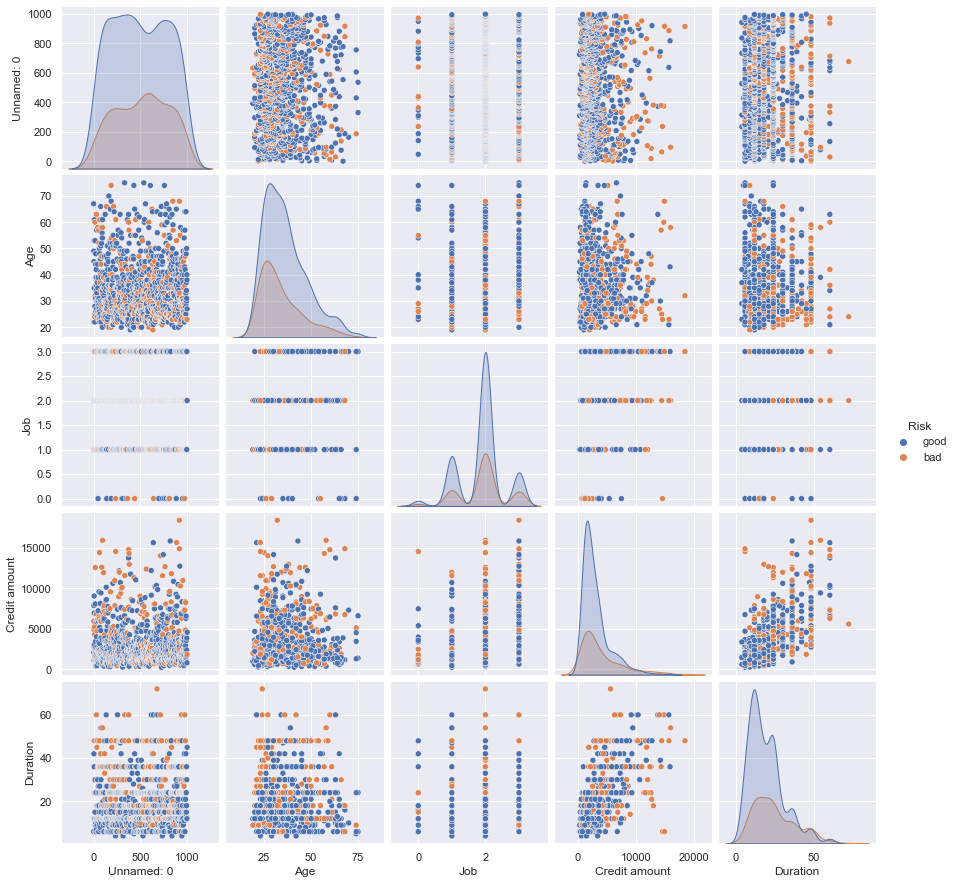

In [33]:
fig = plt.figure(figsize=(15, 15))

sns.pairplot(data=data, hue='Risk')
plt.show()

## 2.4. Data Cleaning

Before we dive into the machine learning part of this notebook, we have some cleaning to do. Machine learning algorithms have problems when dealing with missing values (see how many non-null values the columns Saving accounts and Checking account below have). As a first step, we will deal with that.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


-------------------

The first column is an extra index. Let's drop it:

In [35]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Missing values

There are several ways to handle missing values:
- Imputation - Replacing the missing values with a real value (e.g. mean or median of the feature)
- Deleting entries with missing values
- Deleting columns/features with missing values

The correct way to handle missing data is not universal. For example, if the number of missing values is too high, imputation will add a lot of noise, which can make model learning very difficult.

If we have a small data set, deleting entries means we would have even fewer data points to train on.

If all features in a data set have missing values, it doesn't make sense to delete those features.

In our case, however, the missing values are in only two of the **categorical** columns - `Saving accounts` and `Checking account`. The missing values must then correspond to cases where is was unknown whether the person had such an account, or how much money was in it.

Let's check how well these features correspond to the target variable `Risk`.

In [36]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

<AxesSubplot:xlabel='Saving accounts', ylabel='Count'>

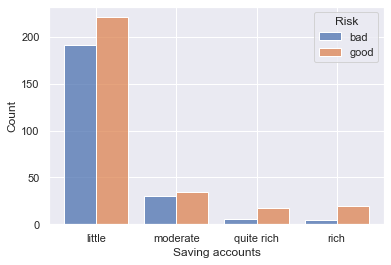

In [37]:
sns.histplot(data=data.dropna(axis=0), 
             x="Saving accounts", hue="Risk", multiple="dodge", shrink=.8)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


What about the NaN values? Let's treat them as a separate category. First, `Savings accounts`:

<AxesSubplot:xlabel='Count', ylabel='Saving accounts'>

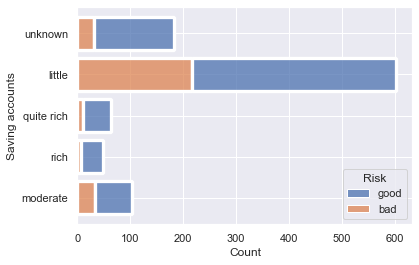

In [39]:
sns.histplot(data=data.fillna('unknown'), y="Saving accounts", hue="Risk", multiple="stack", shrink=.8)

Then, `Checking account`:

<AxesSubplot:xlabel='Count', ylabel='Checking account'>

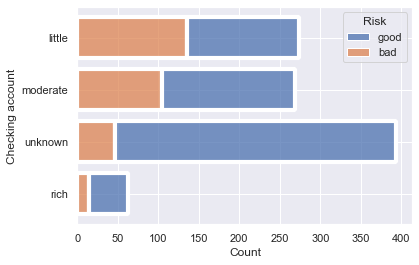

In [40]:
sns.histplot(data=data.fillna('unknown'), y="Checking account", hue="Risk", multiple="stack", shrink=.8)

There are many more examples of good credit than bad credit when the value of the two features is `unknown`. So this category might help with the prediction of the risk. However, in the real world, this type of missing data is not random and can make our model very biased - for example, the `unknown` category's distribution most closely matches the distribution of the `rich` categories.  

In [41]:
data = data.fillna('unknown')

### Categories

`pandas` provides a nice data structure to represent the categories of a `DataFrame` column. The benefits of using categories instead of simple strings include compact data size (scales with the number of categories!), ability to impose an ordering the categories, and plotting support.

In [42]:
from pandas.api.types import CategoricalDtype

In [43]:
category_cols = [col for col in data.columns if len(data[col].value_counts()) < 10]
data[category_cols] = data[category_cols].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving accounts   1000 non-null   category
 5   Checking account  1000 non-null   category
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
 9   Risk              1000 non-null   category
dtypes: category(7), int64(3)
memory usage: 31.7 KB


The `.describe()` method (an others!) now behave differently when working with categorical data.

In [ ]:
data['Purpose'].describe()

In [ ]:
data['Age'].describe()

We can also give an ordering for the categories, for example the job variable has a natural ordering that we can use.

In [ ]:
data['Job']

In [ ]:
data['Job'] = data['Job'].astype(CategoricalDtype(ordered=True))   # the function call changes, now receiving an object
data['Job']

### One-hot encodings

In [44]:
for col in category_cols:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

In [45]:
one_hot_data = data.drop(category_cols, axis=1)
one_hot_data.drop(['Sex_male', 'Housing_rent', 'Saving accounts_unknown', 'Checking account_unknown',
                  'Risk_good', ], axis=1, inplace=True)
one_hot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Credit amount                1000 non-null   int64
 2   Duration                     1000 non-null   int64
 3   Sex_female                   1000 non-null   uint8
 4   Job_0                        1000 non-null   uint8
 5   Job_1                        1000 non-null   uint8
 6   Job_2                        1000 non-null   uint8
 7   Job_3                        1000 non-null   uint8
 8   Housing_free                 1000 non-null   uint8
 9   Housing_own                  1000 non-null   uint8
 10  Saving accounts_little       1000 non-null   uint8
 11  Saving accounts_moderate     1000 non-null   uint8
 12  Saving accounts_quite rich   1000 non-null   uint8
 13  Saving accounts_rich         1000 non-null   uint

## Convert to numerical

Since most machine learning algorithms require numerical data, let's just use our category codes instead of the values.

In [ ]:
data.head()

In [ ]:
num_data = data.copy()
for col in category_cols:
    num_data[col] = data[col].cat.codes
num_data.head()

In [ ]:
num_data['Is_Bad'] = 1 - num_data['Risk']
num_data.drop('Risk', axis=1, inplace=True)
num_data

In [ ]:
num_data.info()

We now have the `Risk_Bad` variable with 1 being True and 0 False. We make this transformation for two reasons:

- More intuitive than having to think what Risk = 0 means.
- Having 'bad' be the positive class (index 1) makes evaluation easier, since we usually want to predict the bad credits anyway.

In [46]:
num_data = one_hot_data.copy()

## 2.5. Predicting the risk

How do we go about using machine learning to predict whether a loan is good or bad risk? 

First, we need to split our data in two separate datesets - a training data set with known labels/risk, and a test data set where we test the learned knowledge.

In [47]:
from sklearn.model_selection import train_test_split

labels = num_data.Risk_bad
features = num_data.drop("Risk_bad", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=123)

# Cast back to DataFrame
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

Next, we need a model. The most important question we need to answer is...

### What are we trying to predict?   

The `Risk` variable, which is binary (two categories) -> Binary classification
There are many algorithms that can solve binary classification problems. We will look at three models based on decision trees - the simple decision tree, the random forest, and the gradient boosted trees. Let's import the algorithms and some other helpful packages first.

In [48]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn import metrics
import graphviz

### Evaluation

After looking into what our model is doing, we can perform a quantitative evaluation. For this, we need to use the learned model to predict the labels of *unseen* data, in this case our test data `X_test`.

Let's first pack everything into a function, since we'll evaluate all three models.

In [49]:

def evaluate_model(model, model_name, test_data, test_labels):

    # Use the learned model to make predictions about unseen data
    test_predictions = model.predict(test_data)
    
    # Print the classification report
    print(metrics.classification_report(test_labels, test_predictions, target_names=['good', 'bad']))
    
    # Evaluate by comparing the predictions with the true labels of the test data (here, in a confusion matrix)
    confusion_matrix = metrics.confusion_matrix(test_labels,  test_predictions)

    # Turn the confusion matrix into a dataframe
    matrix_df = pd.DataFrame(confusion_matrix)

    # Plot the result
    ax = plt.axes()
    sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
    ax.set_title('Confusion Matrix - {}'.format(model_name), fontsize=15)
    ax.set_xlabel("Predicted Risk_bad", fontsize=15)
    ax.set_ylabel("Actual Risk_bad", fontsize=15)
    plt.show()

## Decision Tree

A decision tree is exactly what it sounds like - starting from the top (or the root) of the tree, which contains all data points, we start branching out by choosing feature ranges that allow us to split the data according to the target variable. Having learned a good tree, unseen data is then classified by following the correct tree branches to a tree leaf.

In [53]:
# Create a classifier instance
model_dtree = tree.DecisionTreeClassifier()    

# Learn from the training data = fit the classifier to the training data
model_dtree = model_dtree.fit(X_train, y_train)

Let's visualize the learned tree. It will be saved in a pdf file in the notebook's directory.

In [54]:
dot_data = tree.export_graphviz(model_dtree, out_file=None, feature_names=features.columns, 
                                class_names=np.array(['good', 'bad']), filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("CreditRisk") 

'CreditRisk.pdf'

              precision    recall  f1-score   support

        good       0.77      0.73      0.75       168
         bad       0.50      0.56      0.53        82

    accuracy                           0.67       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.68      0.67      0.68       250



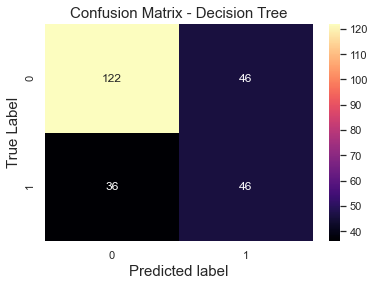

In [55]:
evaluate_model(model_dtree, 'Decision Tree', X_test, y_test)

We can see that the classifier treats the categorical features as numerical (conditions like `Purpose ≤ 4.5`).

In [56]:
recall_scorer = metrics.make_scorer(metrics.recall_score) 

def score_model(model):
    scores = cross_validate(model, X_train, y_train, cv=10,
                           scoring={'recall_bad': recall_scorer}, return_estimator=True)

    print("%0.2f recall (class bad) with a standard deviation of %0.2f" % 
          (scores['test_recall_bad'].mean(), scores['test_recall_bad'].std()))
    return scores

In [57]:
scores_dt = score_model(tree.DecisionTreeClassifier())

0.37 recall (class bad) with a standard deviation of 0.13


In [63]:
scores_dt_df = pd.DataFrame(scores_dt).sort_values(by='test_recall_bad', ascending=False)
scores_dt_df

,fit_time,score_time,estimator,test_recall_bad
0,0.006010,0.000000,DecisionTreeClassifier(),0.571429
3,0.004998,0.003001,DecisionTreeClassifier(),0.500000
5,0.004998,0.001998,DecisionTreeClassifier(),0.454545
9,0.004023,0.001016,DecisionTreeClassifier(),0.454545
4,0.006002,0.002995,DecisionTreeClassifier(),0.409091
8,0.003000,0.003016,DecisionTreeClassifier(),0.363636
1,0.014458,0.003001,DecisionTreeClassifier(),0.333333
6,0.005002,0.001997,DecisionTreeClassifier(),0.272727
7,0.004000,0.002000,DecisionTreeClassifier(),0.272727
2,0.007001,0.003001,DecisionTreeClassifier(),0.090909


In [64]:
scores_dt_df.loc[0, 'estimator']

DecisionTreeClassifier()

              precision    recall  f1-score   support

        good       0.74      0.74      0.74       168
         bad       0.46      0.46      0.46        82

    accuracy                           0.65       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.65      0.65      0.65       250



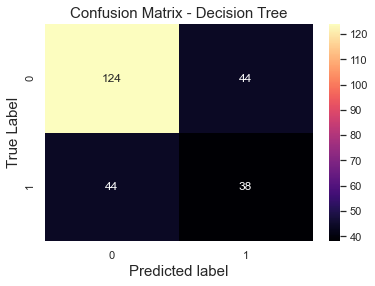

In [66]:
best_model_dtree = scores_dt_df.loc[0, 'estimator']
evaluate_model(best_model_dtree, 'Decision Tree', X_test, y_test)

The confusion matrix compares the predictions with the true test labels. The diagonal shows the correct guesses and above and below are the 'confusions' where our model was wrong.

We can see that the diagonal is brighter, which is a good sign. However, the `good` credit (label 1) is much easier to predict (lower right) than the `bad` credit (upper left). If we think about it, in the real world it is much more important to be able to predict high risk loans than low risk loans. As such, this result is far from optimal, due to the higher cost of classifying a high risk loan as low risk.

----------

Let's take look at other classifiers.

## Random Forest

The random forest is an ensemble of decision trees

In [ ]:
# Create a classifier instance
model_rf = RandomForestClassifier(class_weight='balanced')    

# Learn from the training data = fit the classifier to the training data
model_rf = model_rf.fit(X_train, y_train)      

In [62]:
scores_rf = score_model(RandomForestClassifier(class_weight='balanced_subsample'))

0.29 recall (class bad) with a standard deviation of 0.10


In [ ]:
evaluate_model(model_rf, 'Random Forest', X_train, y_train)

              precision    recall  f1-score   support

        good       0.74      0.86      0.79       168
         bad       0.57      0.37      0.44        82

    accuracy                           0.70       250
   macro avg       0.65      0.61      0.62       250
weighted avg       0.68      0.70      0.68       250



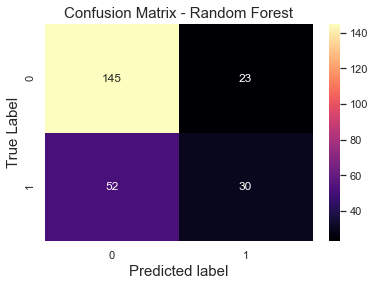

              precision    recall  f1-score   support

        good       0.74      0.89      0.81       168
         bad       0.62      0.38      0.47        82

    accuracy                           0.72       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.70      0.72      0.70       250



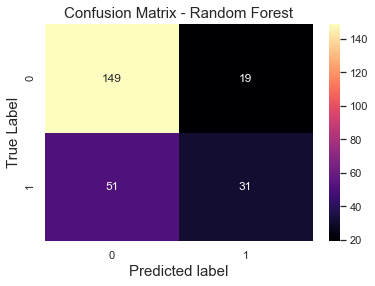

              precision    recall  f1-score   support

        good       0.74      0.90      0.81       168
         bad       0.63      0.35      0.45        82

    accuracy                           0.72       250
   macro avg       0.69      0.63      0.63       250
weighted avg       0.70      0.72      0.69       250



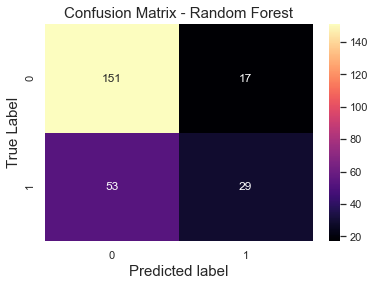

              precision    recall  f1-score   support

        good       0.75      0.92      0.82       168
         bad       0.68      0.37      0.48        82

    accuracy                           0.74       250
   macro avg       0.71      0.64      0.65       250
weighted avg       0.73      0.74      0.71       250



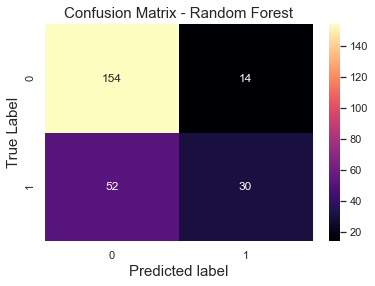

              precision    recall  f1-score   support

        good       0.74      0.90      0.82       168
         bad       0.64      0.35      0.46        82

    accuracy                           0.72       250
   macro avg       0.69      0.63      0.64       250
weighted avg       0.71      0.72      0.70       250



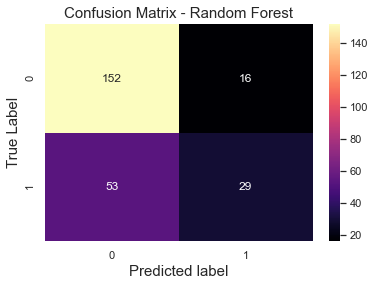

              precision    recall  f1-score   support

        good       0.75      0.92      0.82       168
         bad       0.68      0.37      0.48        82

    accuracy                           0.74       250
   macro avg       0.71      0.64      0.65       250
weighted avg       0.73      0.74      0.71       250



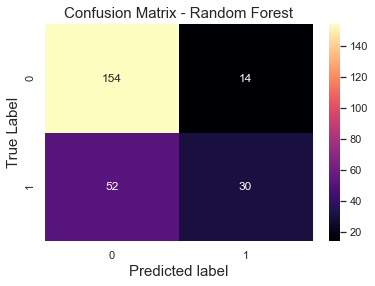

              precision    recall  f1-score   support

        good       0.73      0.89      0.80       168
         bad       0.60      0.34      0.43        82

    accuracy                           0.71       250
   macro avg       0.66      0.61      0.62       250
weighted avg       0.69      0.71      0.68       250



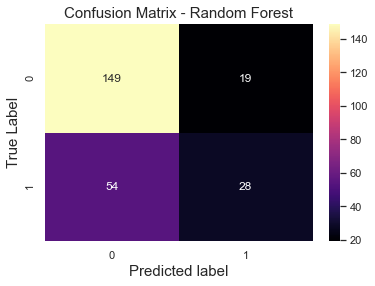

              precision    recall  f1-score   support

        good       0.75      0.90      0.82       168
         bad       0.66      0.38      0.48        82

    accuracy                           0.73       250
   macro avg       0.70      0.64      0.65       250
weighted avg       0.72      0.73      0.71       250



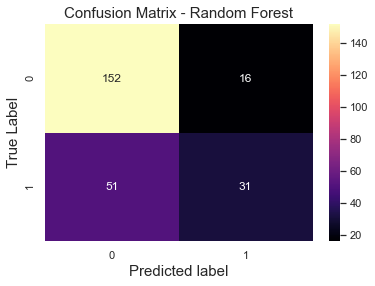

              precision    recall  f1-score   support

        good       0.74      0.90      0.81       168
         bad       0.64      0.37      0.47        82

    accuracy                           0.72       250
   macro avg       0.69      0.63      0.64       250
weighted avg       0.71      0.72      0.70       250



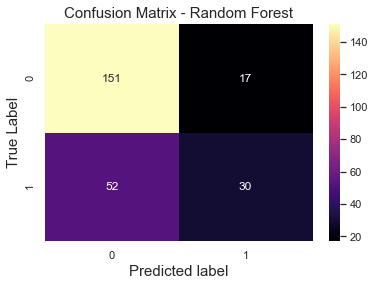

              precision    recall  f1-score   support

        good       0.75      0.88      0.81       168
         bad       0.60      0.39      0.47        82

    accuracy                           0.72       250
   macro avg       0.67      0.63      0.64       250
weighted avg       0.70      0.72      0.70       250



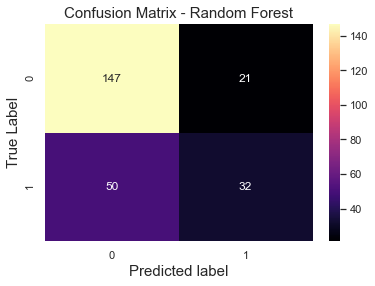

In [63]:
for est in scores_rf['estimator']:
    evaluate_model(est, 'Random Forest', X_test, y_test)

## Logistic Regression

Logistic regression is a different type of classification algorithm. It used gradient descent to minimize a given error/loss function. However, gradient methods assume the input data are either normalized (to a given range) or standardized (to the same mean and standard deviation). The latter is usually done when the feature follow the Gaussian bell curve, while the former can be applied to any feature distribution.

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler instance
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)  
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

X_train_std.head()

,Age,Credit amount,Duration,Sex_female,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.178571,0.050567,0.250000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.214286,0.071311,0.107143,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.285714,0.576208,0.767857,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.267857,0.152250,0.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.303571,0.155662,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


0.71 recall (class bad) with a standard deviation of 0.10
              precision    recall  f1-score   support

        good       0.85      0.65      0.74       168
         bad       0.52      0.77      0.62        82

    accuracy                           0.69       250
   macro avg       0.68      0.71      0.68       250
weighted avg       0.74      0.69      0.70       250



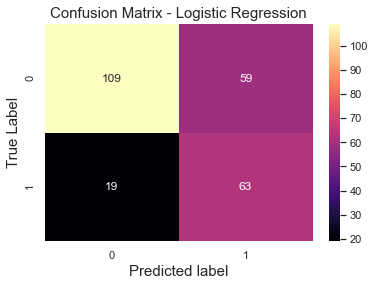

              precision    recall  f1-score   support

        good       0.87      0.67      0.76       168
         bad       0.54      0.79      0.64        82

    accuracy                           0.71       250
   macro avg       0.71      0.73      0.70       250
weighted avg       0.76      0.71      0.72       250



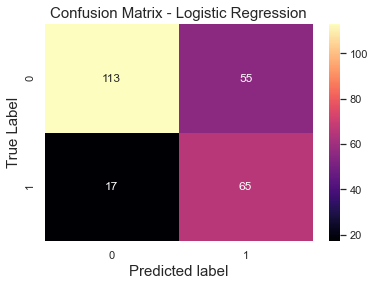

              precision    recall  f1-score   support

        good       0.86      0.68      0.76       168
         bad       0.55      0.78      0.64        82

    accuracy                           0.72       250
   macro avg       0.71      0.73      0.70       250
weighted avg       0.76      0.72      0.72       250



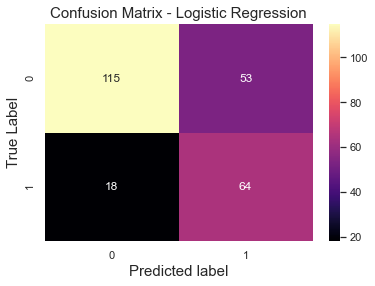

              precision    recall  f1-score   support

        good       0.85      0.67      0.75       168
         bad       0.53      0.77      0.63        82

    accuracy                           0.70       250
   macro avg       0.69      0.72      0.69       250
weighted avg       0.75      0.70      0.71       250



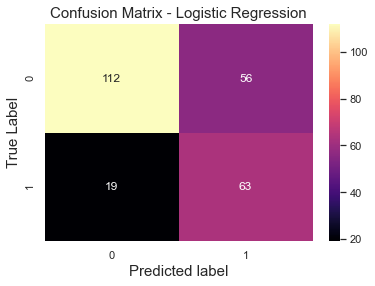

              precision    recall  f1-score   support

        good       0.88      0.67      0.76       168
         bad       0.54      0.80      0.65        82

    accuracy                           0.71       250
   macro avg       0.71      0.74      0.70       250
weighted avg       0.77      0.71      0.72       250



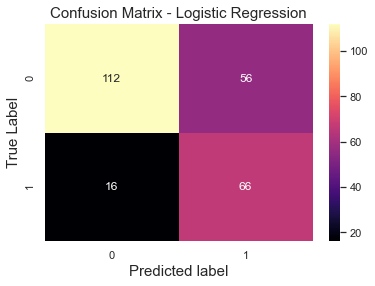

              precision    recall  f1-score   support

        good       0.86      0.65      0.74       168
         bad       0.52      0.78      0.62        82

    accuracy                           0.69       250
   macro avg       0.69      0.71      0.68       250
weighted avg       0.75      0.69      0.70       250



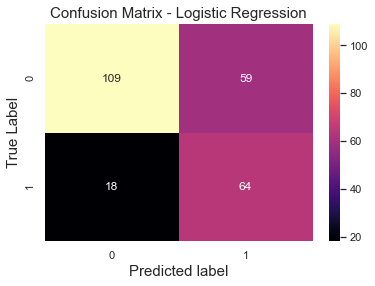

              precision    recall  f1-score   support

        good       0.86      0.68      0.76       168
         bad       0.54      0.77      0.64        82

    accuracy                           0.71       250
   macro avg       0.70      0.73      0.70       250
weighted avg       0.75      0.71      0.72       250



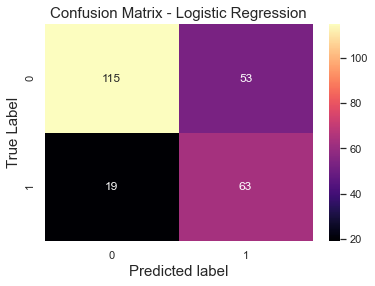

              precision    recall  f1-score   support

        good       0.86      0.67      0.76       168
         bad       0.54      0.78      0.64        82

    accuracy                           0.71       250
   macro avg       0.70      0.73      0.70       250
weighted avg       0.76      0.71      0.72       250



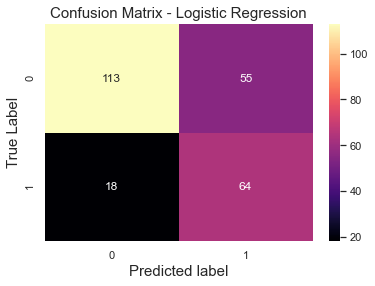

              precision    recall  f1-score   support

        good       0.85      0.65      0.74       168
         bad       0.52      0.76      0.61        82

    accuracy                           0.69       250
   macro avg       0.68      0.71      0.68       250
weighted avg       0.74      0.69      0.70       250



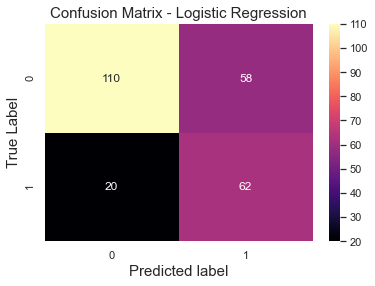

              precision    recall  f1-score   support

        good       0.86      0.65      0.74       168
         bad       0.52      0.78      0.62        82

    accuracy                           0.69       250
   macro avg       0.69      0.71      0.68       250
weighted avg       0.75      0.69      0.70       250



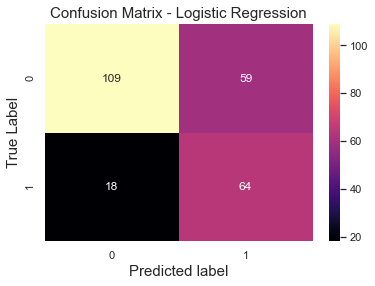

In [52]:
scores_lr = score_model(LogisticRegression(class_weight='balanced', solver='liblinear'))

for est in scores_lr['estimator']:
    evaluate_model(est, 'Logistic Regression', X_test, y_test)

In [ ]:
# Create a classifier instance
model_lr = LogisticRegression(class_weight='balanced')    

# Learn from the training data = fit the classifier to the training data
model_lr = model_lr.fit(X_train_std, y_train)      

In [ ]:
evaluate_model(model_lr, 'Logistic Regression', X_train_std, y_train)

In [ ]:
evaluate_model(model_lr, 'Logistic Regression', X_test_std, y_test)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)